In [1]:
# Mounting Google Drive (e.g. Loading and Saving Data on your Google Drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the 'os' library for using operating system dependent functionality
import os

# Importing the 'pickle' module for serializing (pickling) and deserializing (unpickling) python objects.
import pickle

# Importing string module to perform string operations
import string

# Importing 'numpy' module for mathematical computations or dealing with numpy arrays
import numpy as np

# Importing 'pandas' library for creating and dealing with DataFrames
import pandas as pd

In [3]:
# Setting path for my folder with the main notebook and the refractor notebook folders
base_path = '/content/drive/MyDrive/Hacklahoma/Workshop/'

In [ ]:
# read pickle file function
def read_pickle(foldername,filename):
  # Setting the path of the pickle file
  pickle_path = os.path.join(base_path, foldername, filename)
  # Loading the pickle file and printing its shape
  with open(pickle_path, 'rb') as fp:
     data = pickle.load(fp)
  return data

In [ ]:
# Save a pickle file function
def save_pickle_file(foldername, filename, data):
  file_path = os.path.join(base_path, foldername, filename)
  with open(file_path, 'wb') as handle:
      pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# https://archive.ics.uci.edu/

# https://www.kaggle.com/datasets

# https://openmv.net/tag/missing-data

In [65]:
# reading the dataset
dataset_path = os.path.join(base_path, 'Datasets','employees.csv')

# Loading the dataset file
dataset = pd.read_csv(dataset_path, sep=',')

In [66]:
dataset

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


Data Visualization

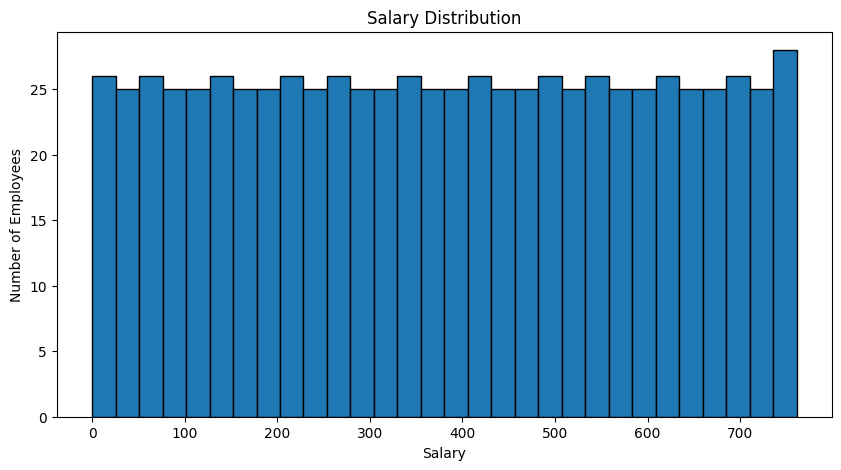

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(dataset['Salary'], bins=30, edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()

<ipython-input-83-79911af157d8>:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




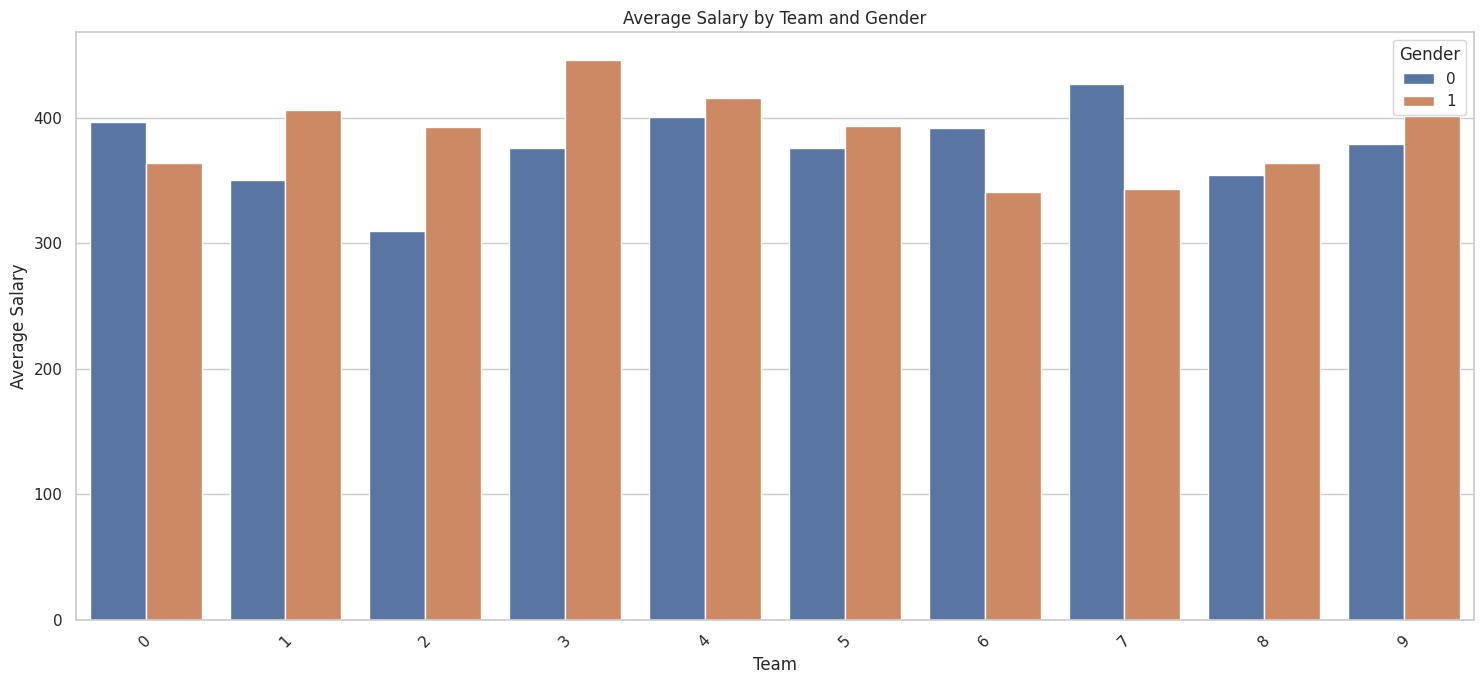

In [83]:
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 7))

avg_salaries = dataset.groupby(['Team', 'Gender'])['Salary'].mean().reset_index()

sns.barplot(x='Team', y='Salary', hue='Gender', data=avg_salaries, ci=None)
plt.title('Average Salary by Team and Gender')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [81]:
import plotly.express as px

fig = px.scatter(dataset, x='Salary', y='Bonus %', color='Gender',
                 hover_data=['First Name', 'Team'],
                 title='Scatter Plot of Salary vs. Bonus %')
fig.show()

Handling NaN/Missing Values

In [76]:
print(dataset.isnull().sum())
#print((dataset['First Name'] == 'Missing').sum().sum())

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64


In [74]:
dataset = dataset.dropna()
dataset = dataset.reset_index(drop = True)
#dataset.fillna(dataset.mode()[0], inplace=True)
#dataset.fillna('Missing', inplace=True)

Data Encoding For Machine Learning

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
# Initialize the encoder
label_encoder = LabelEncoder()

In [55]:
# Fit and Transform the
encoded_data = label_encoder.fit_transform(['A', 'B', 'C'])

In [56]:
encoded_data

array([0, 1, 2])

In [ ]:
label_encoders = {}

for column in dataset.columns:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

In [75]:
dataset

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,54,1,669,133,433,250,1,7
1,129,0,403,69,652,454,0,4
2,89,1,363,148,697,356,1,4
3,118,1,32,340,456,13,1,1
4,47,1,396,180,557,392,0,6
...,...,...,...,...,...,...,...,...
759,67,1,514,387,447,161,1,7
760,152,1,52,429,55,736,0,4
761,167,1,459,129,430,14,0,8
762,118,1,401,339,184,461,0,0


Web Scraping: Creating a dataset. Check robots.txt first before scraping


In [84]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Base URL
BASE_URL = 'https://www.dictionary.com/browse/'

In [96]:
def get_definitions(word):
    url = BASE_URL + word
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Failed to fetch the definition for {word}")
        return []

    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract definitions
    definitions = []
    for tag in soup.find_all(attrs={"data-type": "word-definition-content"}):
        definitions.append(tag.text)
    return definitions

def save_excel_file(data, filename):
    excel_path = os.path.join(base_path, filename)
    data.to_excel(excel_path, index=False)
    print('Excel File Successfully Saved:', excel_path)

In [99]:
words_to_search = input("Enter words separated by commas: ").split(',')
all_data = []

max_definitions = 0

for word in words_to_search:
    word = word.strip()
    defs = get_definitions(word)

    if len(defs) > max_definitions:
        max_definitions = len(defs)

    word_data = {'Word': word}
    for i, d in enumerate(defs, 1):
        word_data[f'Definition {i}'] = d

    all_data.append(word_data)

for entry in all_data:
    for i in range(1, max_definitions + 1):
        if f'Definition {i}' not in entry:
            entry[f'Definition {i}'] = ''

scraped_data = pd.DataFrame(all_data)
save_excel_file(scraped_data, 'definitions.xlsx')

Enter words separated by commas: Test, Car, Cat, Hat
Excel File Successfully Saved: /content/drive/MyDrive/Hacklahoma/Workshop/definitions.xlsx
